
# Boop boop

In [1]:
import importlib

import numpy as np
import torch
import matplotlib.pyplot as plt

import utils
import models

In [2]:
from parse_data import articles_list

In [3]:
encoding = utils.get_encoding(articles_list)
char2int, int2char, int2hot, str2hot, hot2int, hot2str = encoding

In [14]:
importlib.reload(models)

hot_size = len(char2int)

rnn_net_25 = models.RNNModule(hot_size, 25)
rnn_net_50 = models.RNNModule(hot_size, 50)
rnn_net_100 = models.RNNModule(hot_size, 100)
rnn_net_100_2 = models.RNNModule(hot_size, 100, 2)
rnn_net_100_3 = models.RNNModule(hot_size, 100, 3)
rnn_net_200 = models.RNNModule(hot_size, 200)

lstm_net_25 = models.LSTMModule(hot_size, 25)
lstm_net_50 = models.LSTMModule(hot_size, 50)
lstm_net_100 = models.LSTMModule(hot_size, 100)
lstm_net_100_2 = models.LSTMModule(hot_size, 100, 2)
lstm_net_100_3 = models.LSTMModule(hot_size, 100, 3)
lstm_net_200 = models.LSTMModule(hot_size, 200)

In [15]:
#train rnn_net_25
losses_rnn_25 = models.train(rnn_net_25, articles_list, encoding)

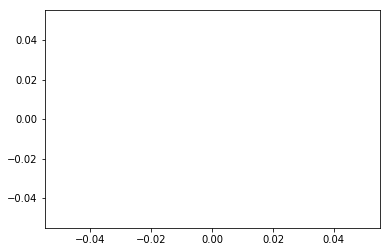

In [16]:
plt.plot(losses_rnn_25)
plt.show()

In [17]:
models.predict(rnn_net_25, encoding, "The", 200)

'Thefdf r idk , dathte urhiwynd,  rneafbT,eesrjy e aptae3creal k h9ovuo,  .a   ogeoTn eiN iotca# hsspi s'

In [235]:
#train rnn_net_50
losses_rnn_50 = models.train(rnn_net_50, articles_list, encoding)

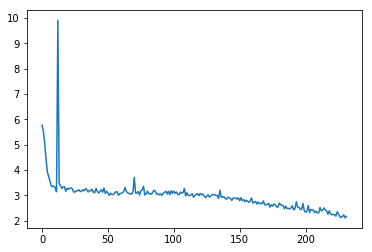

In [236]:
plt.plot(losses_rnn_50)
plt.show()

In [237]:
models.predict(rnn_net_50, encoding, "Very cool")

'+iih d κo e .n’vaTasilopetnt מkiieeooooon2dナiaea aralo9oK.tonrtua— ,d gwlḥorluliam8w a\u200apcnsebins"ḥaa'

In [238]:
#train rnn_net_100
losses_rnn_100 = models.train(rnn_net_100, articles_list, encoding)

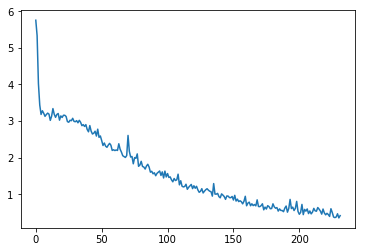

In [239]:
plt.plot(losses_rnn_100)
plt.show()

In [240]:
models.predict(rnn_net_100, encoding, "Very cool")

'ololorororororororoMuo,ouououomorororororororacakananananininininAndndndididigigigieipipipipiɛicicic'

In [447]:
#train lstm_net_25
losses_lstm_25 = models.train(lstm_net_25, articles_list, encoding)

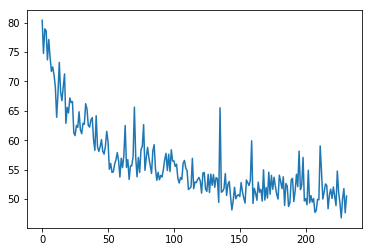

In [448]:
plt.plot(losses_lstm_25)
plt.show()

In [457]:
importlib.reload(models)
models.predict(lstm_net_25, encoding, "a whale")

"a whales is whastich 7 31è, meal meatibation yeans.\nThar whact-ally hagan is on ''Nuin, betomeres a heve ni"

In [318]:
#train lstm_net_50
losses_lstm_50 = models.train(lstm_net_50, articles_list, encoding)

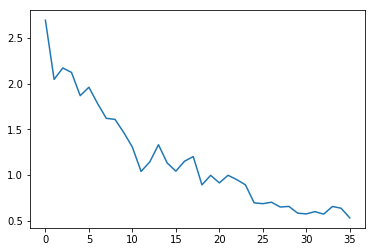

In [319]:
plt.plot(losses_lstm_50)
plt.show()

In [323]:
models.predict(lstm_net_50, encoding, "Very cool")

'Very coolollsllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll'

In [324]:
#train lstm_net_100
losses_lstm_100 = models.train(lstm_net_100, articles_list, encoding, batch_size=100, reset_hidden=False)

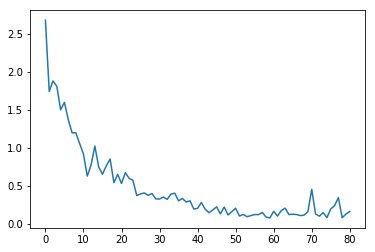

In [325]:
plt.plot(losses_lstm_100)
plt.show()

In [347]:
models.predict(lstm_net_100, encoding, "What", 1000)

'Whatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatatitititititititititititititititititititititititititititititititititititititititititititititititititititititititititip|ppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppsppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppupppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppspspspspspspsssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss

In [464]:
#train lstm_net_100
importlib.reload(models)
lstm_net_100_3 = models.LSTMModule(len(char2int), 100, 3)
losses_lstm_100_3 = models.train(lstm_net_100_3, articles_list, encoding, batch_size=100)

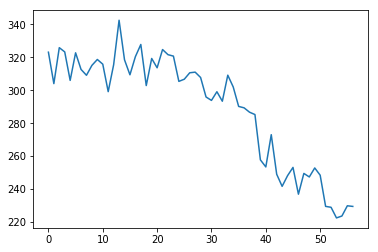

Whenored bortens fooad ar pondipt podins  'P~cod thorins.'''asper klocn, goedis. 
לhorge. vor-thich in


In [468]:
plt.plot(losses_lstm_100_3)
plt.show()
print(models.predict(lstm_net_100_3, encoding, "Wh", 200))